In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
import datetime

# Pie chart

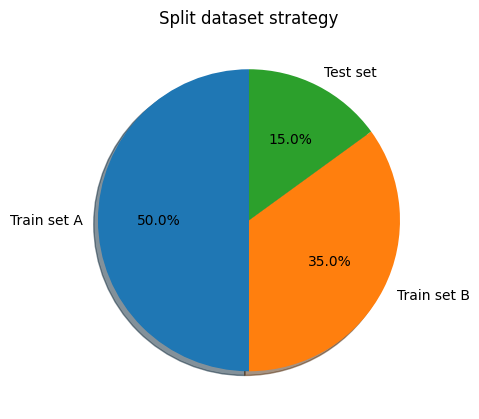

In [10]:
figure(figsize=(7, 5), dpi=100)
labels = 'Train set A', 'Train set B', 'Test set'
value = [500, 350, 150]
explode = (0, 0, 0) 

def absolute_value(val):
    a  = np.round(val/100.*sum(value), 0)
    return a

plt.pie(x=value, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, radius=1)

plt.title("Split dataset strategy")
plt.show()

# Working with dataset

In [60]:
df = pd.read_csv("data/sale_10m.csv", usecols = ["time", "amt_novat", "vat", "quant"], parse_dates=["time"])
df["time_1"] = df["time"].dt.strftime('%Y-%m-%d')

In [61]:
df

,time,amt_novat,vat,quant,time_1
0,2020-12-31 07:11:00+00:00,-42.4,-2.12,-8.81,2020-12-31
1,2020-12-31 11:17:00+00:00,-30.8,0.00,-1.70,2020-12-31
2,2020-12-31 11:17:00+00:00,-67.9,0.00,-17.00,2020-12-31
3,2020-12-31 11:37:00+00:00,-22.3,-2.23,-17.00,2020-12-31
4,2020-12-31 11:37:00+00:00,-47.2,-4.72,-34.00,2020-12-31
...,...,...,...,...,...
59994,2021-01-05 01:32:00+00:00,21.9,2.19,17.00,2021-01-05
59995,2021-01-05 01:32:00+00:00,40.4,4.04,17.00,2021-01-05
59996,2021-01-05 11:38:00+00:00,3.6,0.36,1.70,2021-01-05
59997,2021-01-05 11:38:00+00:00,3.4,0.34,1.70,2021-01-05


In [62]:
grouby_result = df.groupby(['time_1'])['amt_novat', "vat", "quant"].agg('sum')

/Users/nguyenhuy/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [69]:
grouby_result["time"] = grouby_result.index
grouby_result = grouby_result.drop(['2020-12-29'], axis=0)
grouby_result

,amt_novat,vat,quant,time
time_1,,,,
2020-12-30,214733.3,13016.82,67270.67,2020-12-30
2020-12-31,669073.4,52215.63,159408.00,2020-12-31
2021-01-01,371364.0,24618.77,99102.98,2021-01-01
2021-01-02,316410.2,24000.30,80316.21,2021-01-02
2021-01-04,102348.1,5430.00,39372.81,2021-01-04
2021-01-05,184900.1,14419.89,55129.69,2021-01-05


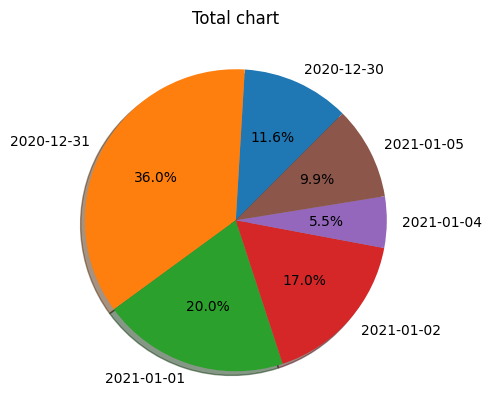

In [70]:
figure(figsize=(7, 5), dpi=100)
explode = np.zeros(len(grouby_result["amt_novat"]))

def absolute_value(val):
    a  = np.round(val/100.*sum(value), 0)
    return a

plt.pie(x=grouby_result["amt_novat"], explode=explode, labels=grouby_result["time"], autopct='%1.1f%%',
        shadow=True, startangle=45, radius=1)

plt.title("Total chart")
plt.show()

Reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html#matplotlib.pyplot.pie